In [3]:
import shap
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# California Housing Prices
dataset = fetch_california_housing(as_frame = True)
X = dataset['data']
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# Prepares a default instance of the random forest regressor
model = RandomForestRegressor()
# Fits the model on the data
model.fit(X_train, y_train)

RandomForestRegressor()

In [6]:
X_test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1699,5.5000,35.0,5.981061,0.920455,734.0,2.780303,37.96,-122.28
12069,4.2386,6.0,7.723077,1.169231,228.0,3.507692,33.83,-117.55
13018,2.7174,26.0,5.171429,1.020168,1603.0,2.694118,38.69,-121.20
10835,4.4732,25.0,4.712617,1.060748,1024.0,2.392523,33.68,-117.92
10802,5.2333,34.0,4.868020,1.167513,384.0,1.949239,33.60,-117.96


In [10]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test.head(100))
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test.head(100))

Exact explainer: 101it [00:42,  1.81it/s]


In [ ]:
# Evaluate SHAP values
shap_values = explainer.shap_values(X)

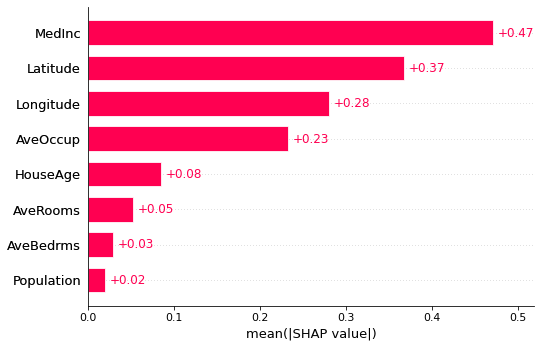

In [11]:
shap.plots.bar(shap_values)

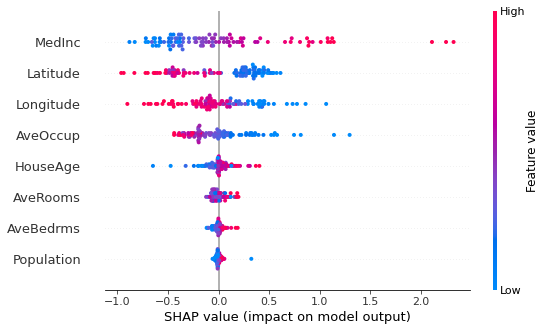

In [12]:
shap.summary_plot(shap_values)

In [14]:
shap.plots.force(shap_values[0])